In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("cricket_data.csv")  # Adjust path if needed

# Clean 'Highest_Score'
df['Highest_Score'] = df['Highest_Score'].str.replace('*', '', regex=False)
df['Highest_Score'] = pd.to_numeric(df['Highest_Score'], errors='coerce')

# List of numeric columns to convert
numeric_columns = [
    'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Batting_Average',
    'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries',
    'Fours', 'Sixes', 'Catches_Taken', 'Stumpings', 'Matches_Bowled',
    'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average',
    'Economy_Rate', 'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")


In [2]:
df.describe()


,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
count,1130.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.00000,1131.000000,...,1131.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000
mean,2019.233628,9.008842,1.486295,132.136163,33.212202,17.427339,98.550840,102.224527,0.04244,0.734748,...,0.163572,9.049558,92.946903,125.013274,4.459292,18.572442,5.471097,13.050177,0.079646,0.017699
std,3.992500,5.531560,1.697092,171.030647,32.438820,16.531119,122.665593,59.236857,0.26932,1.382707,...,0.704435,5.516159,118.389409,153.815733,6.363274,23.806204,4.568269,15.710709,0.310478,0.131914
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,0.000000,5.000000,4.000000,1.000000,6.000000,65.975000,0.00000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,10.000000,1.000000,42.000000,23.000000,14.550000,38.000000,118.900000,0.00000,0.000000,...,0.000000,10.000000,27.000000,44.500000,1.000000,15.340000,7.250000,12.000000,0.000000,0.000000
75%,2022.750000,14.000000,2.000000,227.000000,58.000000,28.275000,167.000000,139.820000,0.00000,1.000000,...,0.000000,14.000000,168.750000,236.000000,8.000000,29.382500,8.800000,21.967500,0.000000,0.000000
max,2024.000000,19.000000,10.000000,973.000000,140.000000,101.000000,640.000000,400.000000,4.00000,9.000000,...,6.000000,19.000000,408.000000,564.000000,32.000000,189.000000,36.000000,120.000000,3.000000,1.000000


In [3]:
df.isnull().sum()

Year                   42
Player_Name             0
Matches_Batted         41
Not_Outs               41
Runs_Scored            41
Highest_Score          41
Batting_Average        41
Balls_Faced            41
Batting_Strike_Rate    41
Centuries              41
Half_Centuries         41
Fours                  41
Sixes                  41
Catches_Taken          41
Stumpings              41
Matches_Bowled         42
Balls_Bowled           42
Runs_Conceded          42
Wickets_Taken          42
Best_Bowling_Match      0
Bowling_Average        42
Economy_Rate           42
Bowling_Strike_Rate    42
Four_Wicket_Hauls      42
Five_Wicket_Hauls      42
dtype: int64

C:\Users\BioPh\AppData\Local\Temp\ipykernel_15460\1634336079.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_run_scorers.values, y=top_run_scorers.index, palette="Blues_d")


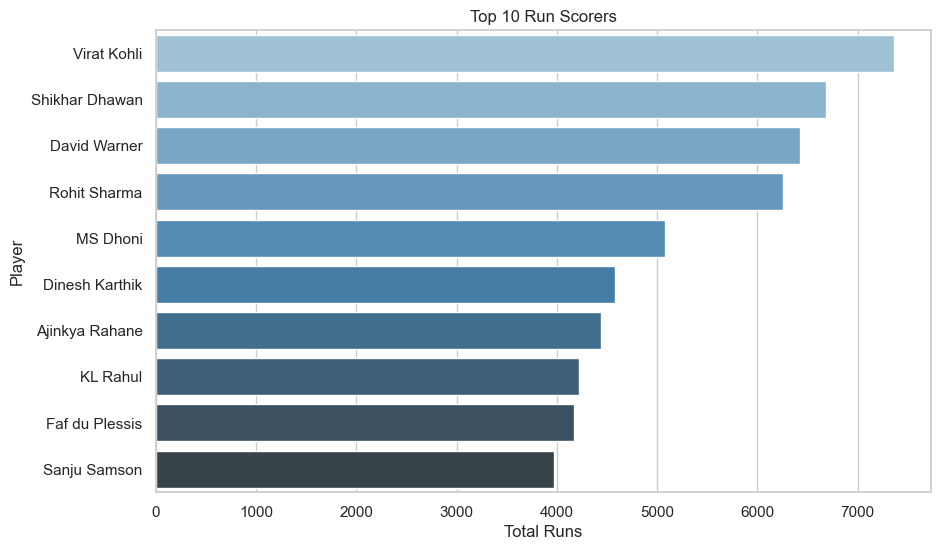

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

top_run_scorers = df.groupby('Player_Name')['Runs_Scored'].sum().nlargest(10)
sns.barplot(x=top_run_scorers.values, y=top_run_scorers.index, palette="Blues_d")
plt.title("Top 10 Run Scorers")
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.show()

C:\Users\BioPh\AppData\Local\Temp\ipykernel_15460\2064525956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette="Greens_d")


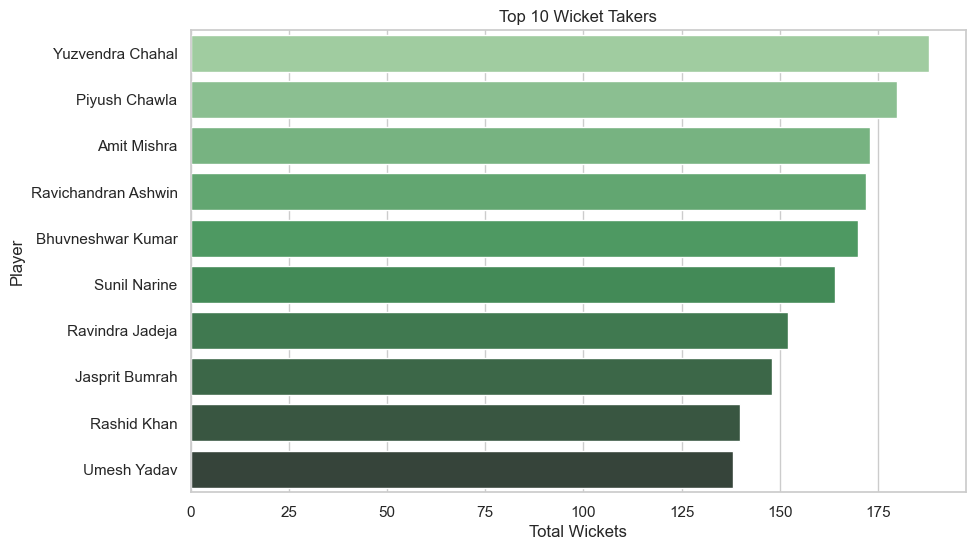

In [5]:
top_wicket_takers = df.groupby('Player_Name')['Wickets_Taken'].sum().nlargest(10)
sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette="Greens_d")
plt.title("Top 10 Wicket Takers")
plt.xlabel("Total Wickets")
plt.ylabel("Player")
plt.show()


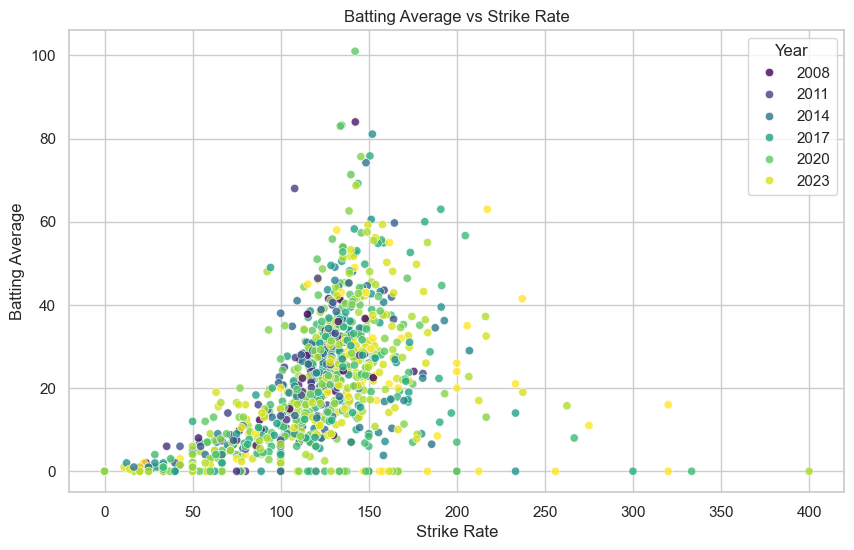

In [6]:
sns.scatterplot(data=df, x='Batting_Strike_Rate', y='Batting_Average', hue='Year', palette='viridis', alpha=0.8)
plt.title("Batting Average vs Strike Rate")
plt.xlabel("Strike Rate")
plt.ylabel("Batting Average")
plt.show()

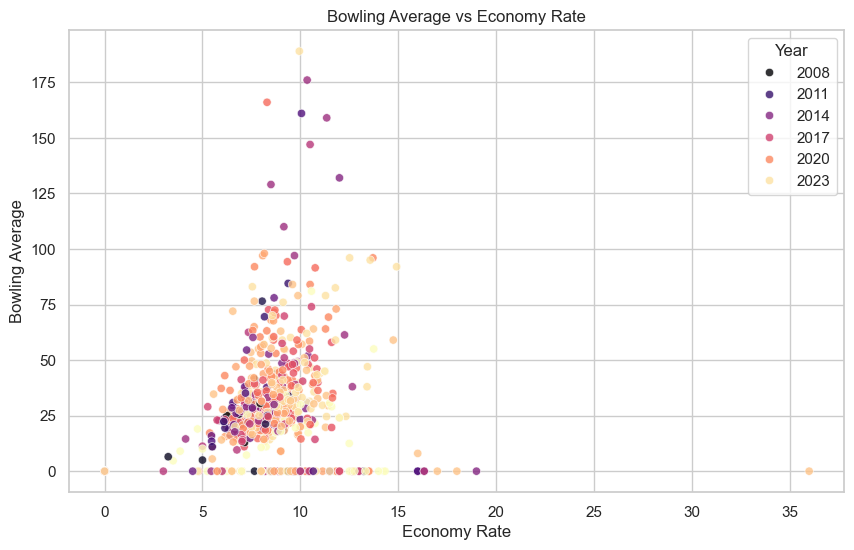

In [7]:
sns.scatterplot(data=df, x='Economy_Rate', y='Bowling_Average', hue='Year', palette='magma', alpha=0.8)
plt.title("Bowling Average vs Economy Rate")
plt.xlabel("Economy Rate")
plt.ylabel("Bowling Average")
plt.show()

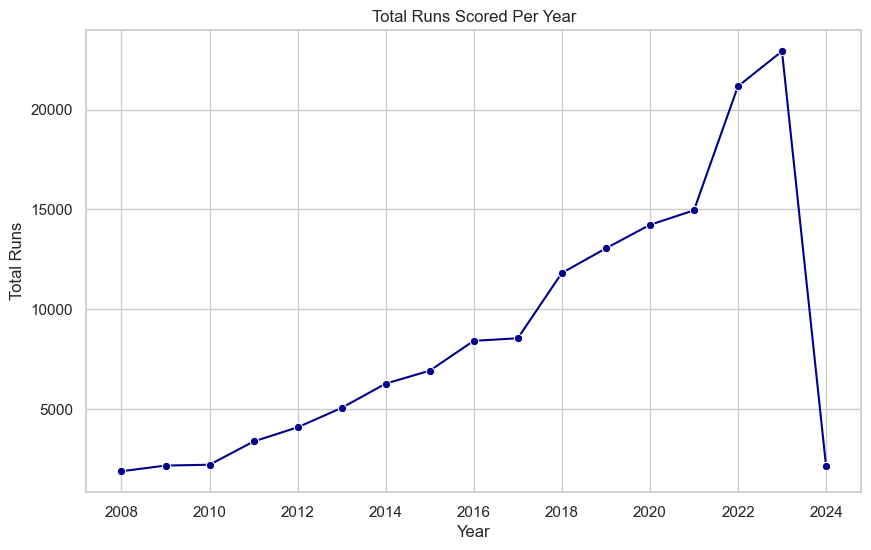

In [8]:
runs_per_year = df.groupby('Year')['Runs_Scored'].sum().reset_index()
sns.lineplot(data=runs_per_year, x='Year', y='Runs_Scored', marker='o', color='darkblue')
plt.title("Total Runs Scored Per Year")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.show()

C:\Users\BioPh\AppData\Local\Temp\ipykernel_15460\677549157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=centuries_per_year, x='Year', y='Players_with_Centuries', palette='OrRd')


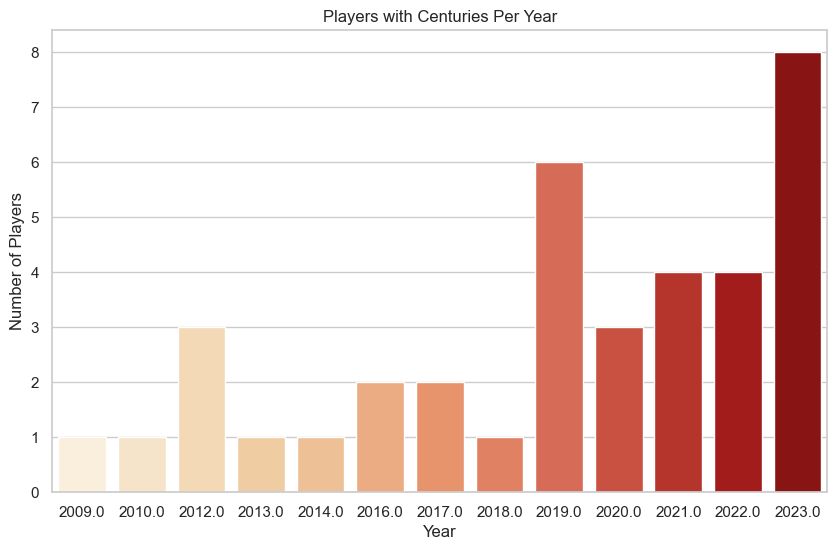

In [9]:
centuries_per_year = df[df['Centuries'] > 0].groupby('Year')['Player_Name'].nunique().reset_index(name='Players_with_Centuries')
sns.barplot(data=centuries_per_year, x='Year', y='Players_with_Centuries', palette='OrRd')
plt.title("Players with Centuries Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.show()